#In this notebook:
we simulate quantum circuits using matrix representations of quantum gates and analyze their runtime for different configurations. Specifically, we explore the runtime for four types of circuits:

Full Circuit: Applies X, H, and CNOT gates. \\
Only X: Applies the X gate to all qubits. \\
X + H: Applies X followed by H to all qubits. \\
X + CNOT: Applies X followed by CNOT gates. \\

#Initialization:
The register is initialized with n qubits, and the state vector is set to the |0...0⟩ state.
#Methods in Reg Class
##apply_gate(self, gate, qubit)

##Description:
Applies a specified single-qubit gate to the indicated qubit in the quantum register.
##Parameters:
###gate:
The quantum gate matrix (e.g., Hadamard, Pauli-X).
###qubit:
The index of the qubit to which the gate is applied.
###Implementation:
Uses the tensordot function to apply the gate, then adjusts the tensor's axes to maintain the correct shape.

#CNOT(self, control, target)

##Description:
Applies the CNOT gate, using the control qubit to potentially flip the target qubit.
##Parameters:
###control:
The index of the control qubit.
###target:
The index of the target qubit.
###Implementation:
Uses tensordot to apply the CNOT tensor and adjusts the axes accordingly.

In [ ]:
# Define the Reg class to represent the quantum register
class Reg:
    def __init__(self, n):
        self.n = n
        self.psi = np.zeros((2,) * n)  # Initialize the state as a tensor of zeros
        self.psi[(0,) * n] = 1  # Set the |0,...,0⟩ state to 1

    def apply_gate(self, gate, qubit):
        # Apply a gate to the specified qubit in the register
        self.psi = np.tensordot(gate, self.psi, (1, qubit))  # Apply the gate
        self.psi = np.moveaxis(self.psi, 0, qubit)  # Move the axes to maintain proper shape

    def CNOT(self, control, target):
        # Contract 2nd index of CNOT_tensor with control index, and 3rd index of CNOT_tensor with target index.
        self.psi = np.tensordot(CNOT_tensor, self.psi, ((2, 3), (control, target)))
        # Put axes back in the right place
        self.psi = np.moveaxis(self.psi, (0, 1), (control, target))

#run_simulation(num_qubits)

##Description:
Simulates a quantum circuit by initializing the state and applying a series of X and Hadamard gates followed by CNOT gates.
##Parameters:
###num_qubits (int):
The number of qubits to simulate.
###Returns:
The final state vector after applying all gates.

In [ ]:
# Function to run the simulation for n qubits
def run_simulation(num_qubits):
    reg = Reg(num_qubits)  # Create a register with n qubits

    # Apply X and H gates to the qubits
    for i in range(num_qubits - 1):  # Apply gates to first n-1 qubits
        reg.apply_gate(X_matrix, i)
        reg.apply_gate(H_matrix, i)
        if num_qubits > 1:  # Apply CNOT gate if there is a second qubit
            reg.CNOT(i, i+1)

    # Apply X and H on the last qubit without CNOT
    if(num_qubits>0):
      reg.apply_gate(X_matrix, num_qubits-1)
      reg.apply_gate(H_matrix, num_qubits-1)

    return reg.psi

#Executing Full Cirucit

Statevector for 1 qubits:
[ 0.70710678+0.j -0.70710678+0.j]
Statevector for 2 qubits:
[ 0.5+0.j -0.5+0.j -0.5+0.j -0.5+0.j]
Statevector for 3 qubits:
[ 0.35355339+0.j -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
 -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
Statevector for 4 qubits:
[ 0.25+0.j -0.25+0.j -0.25+0.j -0.25+0.j -0.25+0.j  0.25+0.j -0.25+0.j
 -0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j  0.25+0.j
 -0.25+0.j -0.25+0.j]
Statevector for 5 qubits:
[ 0.1767767+0.j -0.1767767+0.j -0.1767767+0.j -0.1767767+0.j
 -0.1767767+0.j  0.1767767+0.j -0.1767767+0.j -0.1767767+0.j
 -0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
 -0.1767767+0.j  0.1767767+0.j -0.1767767+0.j -0.1767767+0.j
 -0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j -0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
 -0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
 -0.1767767+0.j  0.1767767+0.j -0.1767767+0.j -0.1767767+0.j]
Statevector fo

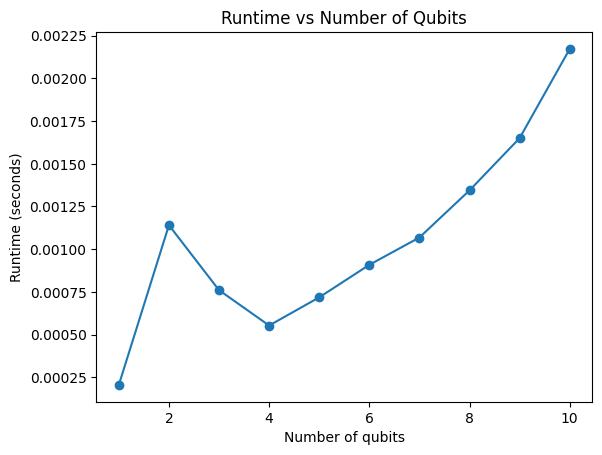

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the quantum gates as matrices
H_matrix = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
X_matrix = np.array([[0, 1], [1, 0]])  # Pauli-X gate

# CNOT matrix for 2 qubits
CNOT_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])

# Reshape CNOT matrix into a tensor
CNOT_tensor = np.reshape(CNOT_matrix, (2, 2, 2, 2))

# Measure runtime for different numbers of qubits
num_qubits_list = range(1,11) # From 1 to 10 qubits
runtimes = []
state_vectors = []

for num_qubits in num_qubits_list:
    start_time = time.time()
    final_state = run_simulation(num_qubits)
    runtimes.append(time.time() - start_time)
    state_vectors.append(final_state)

    # Print the state vector with complex part added
    complex_state = final_state.astype(complex)
    complex_state = np.round(complex_state, decimals=8)  # Round for better readability
    print(f"Statevector for {num_qubits} qubits:")
    print(complex_state.flatten())

# Plot the runtimes
plt.plot(num_qubits_list, runtimes, marker='o')
plt.xlabel('Number of qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Qubits')
plt.show()


#Analysis
We plot the runtime for each circuit as a function of the number of qubits, comparing the execution time of each circuit type.

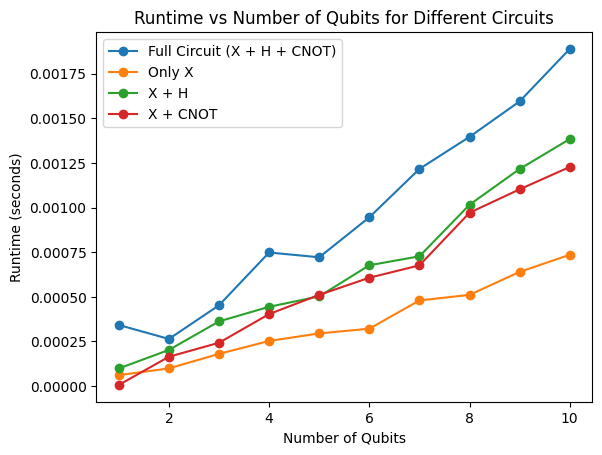

In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the quantum gates as matrices
H_matrix = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
X_matrix = np.array([[0, 1], [1, 0]])  # Pauli-X gate

# CNOT matrix for 2 qubits
CNOT_matrix = np.array([[1, 0, 0, 0],
                        [0, 1, 0, 0],
                        [0, 0, 0, 1],
                        [0, 0, 1, 0]])

# Reshape CNOT matrix into a tensor
CNOT_tensor = np.reshape(CNOT_matrix, (2, 2, 2, 2))

# Define the Reg class to represent the quantum register
class Reg:
    def __init__(self, n):
        self.n = n
        self.psi = np.zeros((2,) * n)  # Initialize the state as a tensor of zeros
        self.psi[(0,) * n] = 1  # Set the |0,...,0⟩ state to 1

    def apply_gate(self, gate, qubit):
        # Apply a gate to the specified qubit in the register
        self.psi = np.tensordot(gate, self.psi, (1, qubit))  # Apply the gate
        self.psi = np.moveaxis(self.psi, 0, qubit)  # Move the axes to maintain proper shape

    def CNOT(self, control, target):
        # Contract 2nd index of CNOT_tensor with control index, and 3rd index of CNOT_tensor with target index.
        self.psi = np.tensordot(CNOT_tensor, self.psi, ((2, 3), (control, target)))
        # Put axes back in the right place
        self.psi = np.moveaxis(self.psi, (0, 1), (control, target))

# Function to apply X gate to all qubits
def apply_X_to_all(num_qubits):
    reg = Reg(num_qubits)  # Create a register with n qubits
    for i in range(num_qubits):  # Apply X gate to all qubits
        reg.apply_gate(X_matrix, i)
    return reg.psi

# Function to apply X followed by H to all qubits
def apply_XH_to_all(num_qubits):
    reg = Reg(num_qubits)  # Create a register with n qubits
    for i in range(num_qubits):  # Apply X followed by H gate to all qubits
        reg.apply_gate(X_matrix, i)
        reg.apply_gate(H_matrix, i)
    return reg.psi

# Function to apply X followed by CNOT gates
def apply_X_CNOT_to_all(num_qubits):
    reg = Reg(num_qubits)
    for i in range(num_qubits - 1):
        reg.apply_gate(X_matrix, i)
        reg.CNOT(i, i + 1)
    return reg.psi

# Function to run the full simulation (X + H + CNOT)
def run_simulation(num_qubits):
    reg = Reg(num_qubits)  # Create a register with n qubits

    # Apply X and H gates to the qubits
    for i in range(num_qubits - 1):  # Apply gates to first n-1 qubits
        reg.apply_gate(X_matrix, i)
        reg.apply_gate(H_matrix, i)
        if num_qubits > 1:  # Apply CNOT gate if there is a second qubit
            reg.CNOT(i, i + 1)

    # Apply X and H on the last qubit without CNOT
    if num_qubits > 0:
        reg.apply_gate(X_matrix, num_qubits - 1)
        reg.apply_gate(H_matrix, num_qubits - 1)

    return reg.psi

# Measure runtime for different numbers of qubits for each circuit type
num_qubits_range = range(1, 11)  # From 1 to 10 qubits
runtimes_full_circ = []
runtimes_only_X = []
runtimes_XandH = []
runtimes_X_CNOT = []

for num_qubits in num_qubits_range:
    # Full circuit (X + H + CNOT)
    start_time_full_circ = time.time()
    run_simulation(num_qubits)
    runtimes_full_circ.append(time.time() - start_time_full_circ)

    # Only X gate
    start_time_only_X = time.time()
    apply_X_to_all(num_qubits)
    runtimes_only_X.append(time.time() - start_time_only_X)

    # X followed by H gate
    start_time_XH = time.time()
    apply_XH_to_all(num_qubits)
    runtimes_XandH.append(time.time() - start_time_XH)

    # X followed by CNOT gate
    start_time_X_CNOT = time.time()
    apply_X_CNOT_to_all(num_qubits)
    runtimes_X_CNOT.append(time.time() - start_time_X_CNOT)

# Plot the runtimes for all circuit types
plt.plot(num_qubits_range, runtimes_full_circ, marker='o', label='Full Circuit (X + H + CNOT)')
plt.plot(num_qubits_range, runtimes_only_X, marker='o', label='Only X')
plt.plot(num_qubits_range, runtimes_XandH, marker='o', label='X + H')
plt.plot(num_qubits_range, runtimes_X_CNOT, marker='o', label='X + CNOT')

# Customize the plot
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs Number of Qubits for Different Circuits')
plt.legend()
plt.show()
